# Backtesting 2800

In [173]:
import pandas as pd
import math
import numpy as np
import datetime as dt
from mpl_finance import candlestick_ohlc
from mpl_finance import candlestick2_ohlc
import yfinance as yf
#import investpy as ipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as TA
from mpl_finance import candlestick2_ohlc
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from datetime import datetime
pd.options.mode.chained_assignment = None
%matplotlib inline

### Data importing and processing

In [174]:
df=yf.download("2800.HK","2019-01-01",interval="60m")

[*********************100%***********************]  1 of 1 completed


In [218]:
df1=yf.download("7500.HK","2019-01-01",interval="60m")

[*********************100%***********************]  1 of 1 completed


In [175]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2019-01-02 09:30:00+08:00,26.00,26.00,25.250000,25.40,25.40,12988346
2019-01-02 10:30:00+08:00,25.40,25.40,25.250000,25.35,25.35,3244848
2019-01-02 11:30:00+08:00,25.35,25.40,25.299999,25.40,25.40,567600
2019-01-02 12:30:00+08:00,25.35,25.40,25.350000,25.35,25.35,1189900
2019-01-02 13:30:00+08:00,25.35,25.35,25.250000,25.35,25.35,3616861


In [219]:
df["Date"]=df.index
df1["Date"]=df1.index

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2566 entries, 2019-01-02 09:30:00+08:00 to 2020-07-10 15:30:00+08:00
Data columns (total 7 columns):
Open         2566 non-null float64
High         2566 non-null float64
Low          2566 non-null float64
Close        2566 non-null float64
Adj Close    2566 non-null float64
Volume       2566 non-null int64
Date         2566 non-null datetime64[ns, Asia/Hong_Kong]
dtypes: datetime64[ns, Asia/Hong_Kong](1), float64(5), int64(1)
memory usage: 160.4 KB


In [220]:
df=df[["Date","Open","High","Low","Close","Volume"]].copy()
df1=df1[["Date","Open","High","Low","Close","Volume"]].copy()


In [179]:
df.tail()

,Date,Open,High,Low,Close,Volume
Datetime,,,,,,
2020-07-10 11:30:00+08:00,2020-07-10 11:30:00+08:00,26.600000,26.639999,26.559999,26.580000,1093452
2020-07-10 12:30:00+08:00,2020-07-10 12:30:00+08:00,26.580000,26.580000,26.340000,26.360001,6659695
2020-07-10 13:30:00+08:00,2020-07-10 13:30:00+08:00,26.360001,26.400000,26.280001,26.340000,17130927
2020-07-10 14:30:00+08:00,2020-07-10 14:30:00+08:00,26.360001,26.360001,26.219999,26.299999,19840133
2020-07-10 15:30:00+08:00,2020-07-10 15:30:00+08:00,26.299999,26.379999,25.500000,26.340000,10094387


In [180]:
df["Date1"]=df["Date"].dt.date
df["Date1"]=pd.to_datetime(df["Date1"],format="%Y-%m-%d")
df["Year"]=df["Date"].dt.year
df["Week"]=df["Date"].dt.week
df["Month"]=df["Date"].dt.month
df["hour"]=df["Date"].dt.hour
df["Gap"]=df["Open"]-df["Close"].shift()
df["Volatility"]=df["High"]-df["Low"]
df["Return"]=df["Close"]-df["Close"].shift()
df["EMA9"]=TA.EMA(df["Close"],9)
df["EMA19"]=TA.EMA(df["Close"],19)
df["EMA50"]=TA.EMA(df["Close"],50)
df["ADX"]=TA.ADX(df["High"],df["Low"],df["Close"])
df["DMI+"]=TA.PLUS_DM(df["High"],df["Low"])
df["DMI-"]=TA.MINUS_DM(df["High"],df["Low"])
df["RSI9"]=TA.RSI(df["Close"],9)
df["macd"],df["macdsignal"],df["macdhist"]=TA.MACD(df["Close"],fastperiod=5, slowperiod=34, signalperiod=5)

In [221]:
df1["Date1"]=df1["Date"].dt.date
df1["Date1"]=pd.to_datetime(df1["Date1"],format="%Y-%m-%d")
df1["Year"]=df1["Date"].dt.year
df1["Week"]=df1["Date"].dt.week
df1["Month"]=df1["Date"].dt.month
df1["hour"]=df1["Date"].dt.hour
df1["Gap"]=df1["Open"]-df1["Close"].shift()
df1["Volatility"]=df1["High"]-df1["Low"]
df1["Return"]=df1["Close"]-df1["Close"].shift()
df1["EMA9"]=TA.EMA(df1["Close"],9)
df1["EMA19"]=TA.EMA(df1["Close"],19)
df1["EMA50"]=TA.EMA(df1["Close"],50)
df1["ADX"]=TA.ADX(df1["High"],df1["Low"],df1["Close"])
df1["DMI+"]=TA.PLUS_DM(df1["High"],df1["Low"])
df1["DMI-"]=TA.MINUS_DM(df1["High"],df1["Low"])
df1["RSI9"]=TA.RSI(df1["Close"],9)
df1["macd"],df1["macdsignal"],df1["macdhist"]=TA.MACD(df1["Close"],fastperiod=5, slowperiod=34, signalperiod=5)

In [222]:
df.tail()

,Date,Open,High,Low,Close,Volume
Datetime,,,,,,
2020-07-10 11:30:00+08:00,2020-07-10 11:30:00+08:00,26.600000,26.639999,26.559999,26.580000,1093452
2020-07-10 12:30:00+08:00,2020-07-10 12:30:00+08:00,26.580000,26.580000,26.340000,26.360001,6659695
2020-07-10 13:30:00+08:00,2020-07-10 13:30:00+08:00,26.360001,26.400000,26.280001,26.340000,17130927
2020-07-10 14:30:00+08:00,2020-07-10 14:30:00+08:00,26.360001,26.360001,26.219999,26.299999,19840133
2020-07-10 15:30:00+08:00,2020-07-10 15:30:00+08:00,26.299999,26.379999,25.500000,26.340000,10094387


In [223]:
df_daily=yf.download("2800.HK","2019-01-01")
df_daily["Date"]=df_daily.index
df_daily.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-01-02,25.950001,26.000000,25.200001,25.250000,24.413321,45382671,2019-01-02
2019-01-03,25.350000,25.450001,25.049999,25.250000,24.413321,31838388,2019-01-03
2019-01-04,25.150000,25.850000,25.100000,25.799999,24.945093,34747027,2019-01-04
2019-01-07,26.200001,26.250000,25.900000,26.049999,25.186811,25451594,2019-01-07
2019-01-08,26.100000,26.200001,25.900000,26.000000,25.138468,35756830,2019-01-08


In [231]:
df_daily1=yf.download("7500.HK","2019-01-01")
df_daily1["Date"]=df_daily1.index
df_daily1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-05-27,7.20,7.20,7.20,7.20,7.20,0,2019-05-27
2019-05-28,7.22,7.22,7.09,7.14,7.14,4546900,2019-05-28
2019-05-29,7.24,7.25,7.12,7.22,7.22,29561300,2019-05-29
2019-05-30,7.22,7.33,7.17,7.27,7.27,24098800,2019-05-30
2019-05-31,7.32,7.41,7.25,7.40,7.40,27726200,2019-05-31


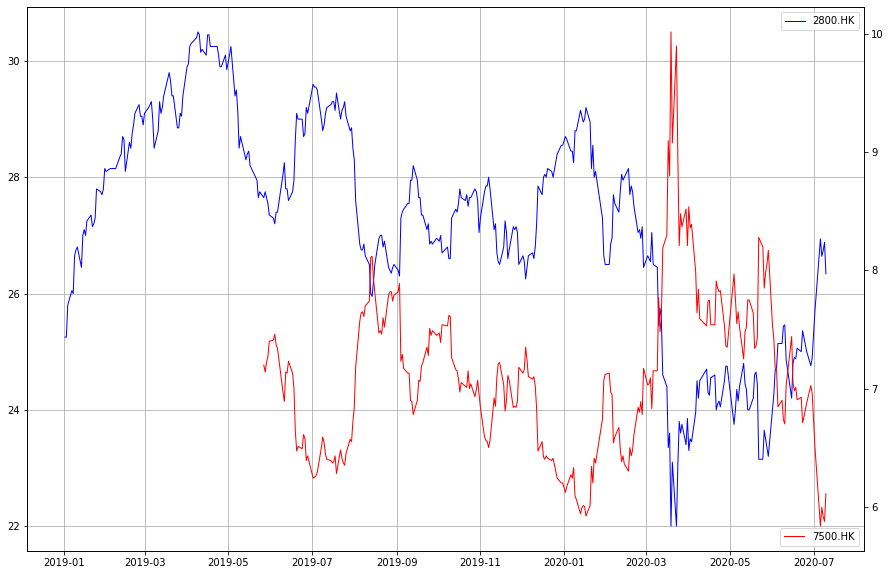

In [234]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_daily["Date"],df_daily["Close"],color="blue",label="2800.HK",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_daily1["Date"],df_daily1["Close"],color="red",label="7500.HK",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

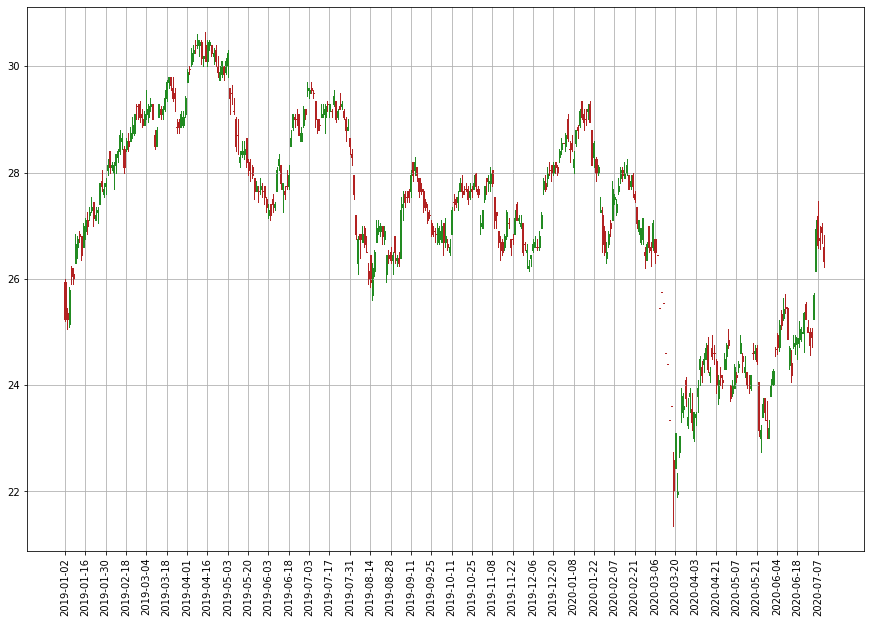

In [225]:
data1=df_daily.copy()
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data1.index),10))
ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d"))

candlestick2_ohlc(ax4, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
ax4.grid(True)
plt.xticks(rotation=90)
plt.show()

In [185]:
df_daily.head(20)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-01-02,25.950001,26.000000,25.200001,25.250000,24.413321,45382671,2019-01-02
2019-01-03,25.350000,25.450001,25.049999,25.250000,24.413321,31838388,2019-01-03
2019-01-04,25.150000,25.850000,25.100000,25.799999,24.945093,34747027,2019-01-04
2019-01-07,26.200001,26.250000,25.900000,26.049999,25.186811,25451594,2019-01-07
2019-01-08,26.100000,26.200001,25.900000,26.000000,25.138468,35756830,2019-01-08
2019-01-09,26.299999,26.850000,26.299999,26.650000,25.766930,54203075,2019-01-09
2019-01-10,26.600000,26.799999,26.400000,26.750000,25.863617,29548145,2019-01-10
2019-01-11,26.850000,26.900000,26.700001,26.799999,25.911959,78966700,2019-01-11
2019-01-14,26.799999,26.799999,26.350000,26.450001,25.573559,10818037,2019-01-14


In [186]:
def chart4(Date1,Date2):    
    data1=df.loc[Date1:Date2].copy()   
    data1["ID"]=range(len(data1))
    f1= plt.subplots(figsize = (15,10))
    
    ax1=plt.subplot2grid((5,1),(0,0),rowspan=2,colspan=1)
    ax1.set_xticks(range(0, len(data1.index), 5))
    ax1.set_xticklabels(data1.index[::5].strftime("%Y-%m-%d %H:%M"))

#     ax4.set_xticks(range(0, len(data1.index),10))
#     ax4.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H%M"))

    candlestick2_ohlc(ax1, opens=data1["Open"], highs=data1["High"], lows=data1["Low"], closes=data1["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
    #RSI9    
    ax2=plt.subplot2grid((5,1),(2,0),sharex=ax1,rowspan=1,colspan=1)
#     ax2.set_xticks(range(0, len(data1.index), 10))
#     ax2.set_xticklabels(data1.index[::10].strftime("%Y-%m-%d %H:%M"))
    ax2.plot(data1["ID"],data1["RSI9"],color="red",label="RSI9")
#DMI/ADX
    ax3=plt.subplot2grid((5,1),(3,0),sharex=ax1,rowspan=1,colspan=1)
    ax3.plot(data1["ID"],data1["DMI+"],color="blue",label="DMI+")
    ax3.plot(data1["ID"],data1["DMI-"],color="red",label="DMI-")
    ax4=ax3.twinx()

    ax4.plot(data1["ID"],data1["ADX"],color="brown",label="ADX")    
    
#MACD    
    ax5=plt.subplot2grid((5,1),(4,0),sharex=ax1,rowspan=1,colspan=1)
    ax5.plot(data1["ID"],data1["macd"],color="blue",label="MACD")
    ax5.plot(data1["ID"],data1["macdsignal"],color="red",label="MACD Signal")
    ax5.bar(data1["ID"],data1["macdhist"],color="brown",label="MACD histogram")

    ax2.legend()
    ax3.legend()
    ax4.legend(loc="lower left")
    ax5.legend()
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=0)
    plt.xticks(rotation=90)
    plt.show()

In [187]:
def cross_over_up(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])>0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)
def cross_over_down(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])<0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [188]:
MACD_crossoverup=cross_over_up(df,"macd","macdsignal")
MACD_crossoverdown=cross_over_down(df,"macd","macdsignal")

In [189]:
MACD_crossoverup.sum()

159

In [190]:
MACD_crossoverdown.sum()

159

In [191]:
df["MACD_crossoverup"]=MACD_crossoverup
df["MACD_crossoverdown"]=MACD_crossoverdown


In [192]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Date1,Year,Week,Month,hour,Gap,Volatility,Return,EMA9,EMA19,EMA50,ADX,DMI+,DMI-,RSI9,macd,macdsignal,macdhist,MACD_crossoverup,MACD_crossoverdown
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 09:30:00+08:00,2019-01-02 09:30:00+08:00,26.000000,26.000000,25.250000,25.400000,12988346,2019-01-02,2019,1,1,9,NaN,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 10:30:00+08:00,2019-01-02 10:30:00+08:00,25.400000,25.400000,25.250000,25.350000,3244848,2019-01-02,2019,1,1,10,0.000000,0.150000,-0.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 11:30:00+08:00,2019-01-02 11:30:00+08:00,25.350000,25.400000,25.299999,25.400000,567600,2019-01-02,2019,1,1,11,0.000000,0.100000,0.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 12:30:00+08:00,2019-01-02 12:30:00+08:00,25.350000,25.400000,25.350000,25.350000,1189900,2019-01-02,2019,1,1,12,-0.049999,0.049999,-0.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 13:30:00+08:00,2019-01-02 13:30:00+08:00,25.350000,25.350000,25.250000,25.350000,3616861,2019-01-02,2019,1,1,13,0.000000,0.100000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 14:30:00+08:00,2019-01-02 14:30:00+08:00,25.350000,25.350000,25.200001,25.250000,8115183,2019-01-02,2019,1,1,14,0.000000,0.150000,-0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-02 15:30:00+08:00,2019-01-02 15:30:00+08:00,25.250000,25.350000,25.200001,25.350000,6571900,2019-01-02,2019,1,1,15,0.000000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-03 09:30:00+08:00,2019-01-03 09:30:00+08:00,25.250000,25.450001,25.150000,25.350000,2429800,2019-01-03,2019,1,1,9,-0.100000,0.300001,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2019-01-03 10:30:00+08:00,2019-01-03 10:30:00+08:00,25.350000,25.400000,25.100000,25.200001,2558149,2019-01-03,2019,1,1,10,0.000000,0.299999,-0.150000,25.333334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [193]:
df_crossover=df.groupby("Date1").aggregate({"MACD_crossoverup":sum,"MACD_crossoverdown":sum})

In [194]:
df_crossover.head(10)

,MACD_crossoverup,MACD_crossoverdown
Date1,,
2019-01-02,0,0
2019-01-03,0,0
2019-01-04,0,0
2019-01-07,0,0
2019-01-08,0,0
2019-01-09,1,1
2019-01-10,0,0
2019-01-11,0,0
2019-01-14,0,0


In [195]:
df_crossover.sort_values("MACD_crossoverup",ascending=False).head(10)

,MACD_crossoverup,MACD_crossoverdown
Date1,,
2019-09-03,3,2
2019-08-12,2,2
2019-07-15,2,1
2020-04-24,2,3
2019-04-08,2,2
2020-02-19,2,1
2019-06-04,2,2
2019-03-14,2,1
2020-01-16,2,1


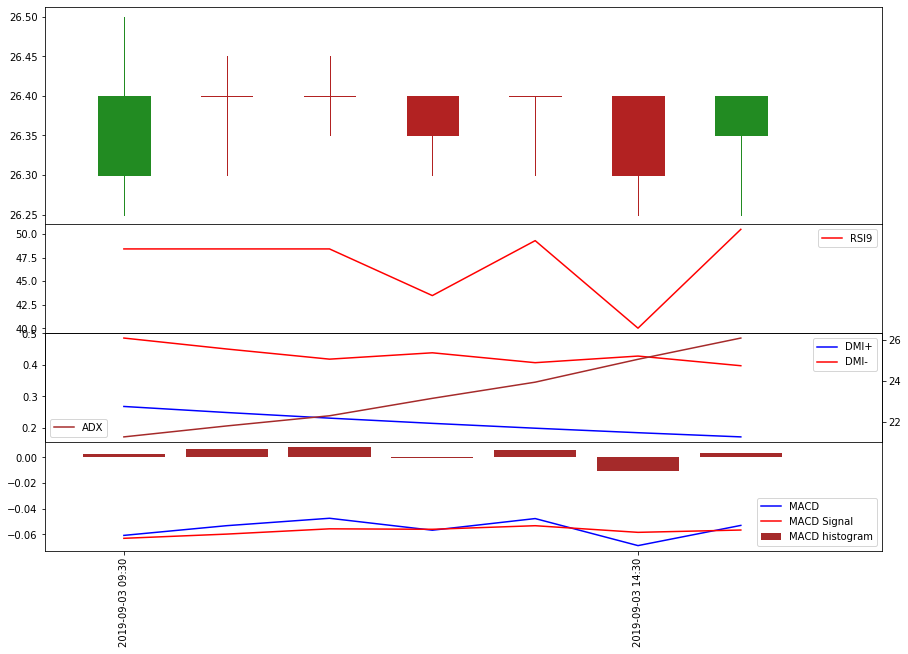

In [196]:
chart4("2019-09-03 09:30","2019-09-3 16:30")

In [197]:
def backtest1(df,amount,stoploss):
    # flag to indicate if the trigger long signal appeared. If yes flag will be changed from zero to one
    flag_long=0
    #it is the max value of the price of the double peak/double bottom pattern
    price1=np.nan
    #it is the min value of the price of the double peak/double bottom pattern
    price0=np.nan
    # It indicates the price of enter after the trigger signal happened. 
    # For double bottom, enter only happened when the close price is higher than price1 as shown below.
    # For double peak, enter only happened when the close price is lower than price0 as shown below.
    price2=np.nan
    # The exit price of the trade
    price3=np.nan
    # To set the profit target
    Amount=amount
    # The stop loss limit used for the backtesting. 
    # It indicates the value below the enter price (price2)
    Stoploss=stoploss
    # It indicates the date of the trigger of the signal
    date_trigger=np.nan

    # Those are the lists used to log all the entries for the open date,close date,open price, close price of the trade
    trade_type=[]
    trade_triggerdate=[]
    trade_OpenDate=[]
    trade_CloseDate=[]
    trade_OpenPrice=[]
    trade_ClosePrice=[]
    trade_ExitReason=[]
    
    #The trading logic for double bottom
    for i in range(1,len(df)-1):    

        if ((df["MACD_crossoverup"].iloc[i]==1) & (flag_long==0)):           

            price1=max(df["High"].iloc[i],df["High"].iloc[i-1])
            price0=min(df["Low"].iloc[i],df["Low"].iloc[i-1])          
            
            date_trigger=df["Date"].iloc[i]
            flag_long=1
            price2=df["Open"].iloc[i+1]
            trade_type.append("MACD_crossoverup")
            trade_triggerdate.append(date_trigger)
            trade_OpenDate.append(df["Date"].iloc[i])
            trade_OpenPrice.append(price2)
            continue

           
            
        if (flag_long==1):           

            if ((df["Low"].iloc[i]<=price0-Stoploss) | 
                 (df["High"].iloc[i]>=price1+Amount) | (df["MACD_crossoverdown"].iloc[i]==1)):    

                flag_long=0
                date_trigger=np.nan

                # Append the date and the price of the exit
                trade_CloseDate.append(df["Date"].iloc[i])
                #trade_ClosePrice.append(price3)
                # To define the exit reason based on the conditions.
                if (df["Low"].iloc[i]<=price0-Stoploss):
                    trade_ExitReason.append("Stop Loss")
                    price3=price0-Stoploss
                    trade_ClosePrice.append(price3)
                elif (df["High"].iloc[i]>=price1+Amount):
                    trade_ExitReason.append("Profit Target")
                    price3=price2+Amount
                    trade_ClosePrice.append(price3)
                elif (df["MACD_crossoverdown"].iloc[i]==1):
                    trade_ExitReason.append("MACD_crossoverdown")

                    price3=df["Open"].iloc[i+1]
                    trade_ClosePrice.append(price3)

                        
                else:
                    trade_ExitReason.append(np.nan)           

            
            continue
            
    df_trade=pd.DataFrame({"Trade_Type":trade_type,"TriggerDate":trade_triggerdate,"OpenDate":trade_OpenDate,"OpenPrice":
                               trade_OpenPrice,"CloseDate":trade_CloseDate,"ClosePrice":trade_ClosePrice,"ExitReason":trade_ExitReason})
    df_trade["Return"]=np.where(df_trade["Trade_Type"]=="MACD_crossoverup",df_trade["ClosePrice"]-df_trade["OpenPrice"],
                               df_trade["OpenPrice"]-df_trade["ClosePrice"])
    return(df_trade)
    

In [198]:
df_trade1=backtest1(df,25,0)

In [199]:
df_trade1.index=df_trade1["OpenDate"]

In [200]:
df_trade1.shape

(159, 8)

In [201]:
df_trade1["Amount"]=df_trade1["Return"]*100

In [202]:
df_trade1

,Trade_Type,TriggerDate,OpenDate,OpenPrice,CloseDate,ClosePrice,ExitReason,Return,Amount
OpenDate,,,,,,,,,
2019-01-09 11:30:00+08:00,MACD_crossoverup,2019-01-09 11:30:00+08:00,2019-01-09 11:30:00+08:00,26.700001,2019-01-09 14:30:00+08:00,26.650000,Stop Loss,-0.050001,-5.000114
2019-01-15 09:30:00+08:00,MACD_crossoverup,2019-01-15 09:30:00+08:00,2019-01-15 09:30:00+08:00,26.900000,2019-01-16 11:30:00+08:00,27.000000,MACD_crossoverdown,0.100000,10.000038
2019-01-16 13:30:00+08:00,MACD_crossoverup,2019-01-16 13:30:00+08:00,2019-01-16 13:30:00+08:00,27.100000,2019-01-17 09:30:00+08:00,26.950001,Stop Loss,-0.150000,-14.999962
2019-01-21 09:30:00+08:00,MACD_crossoverup,2019-01-21 09:30:00+08:00,2019-01-21 09:30:00+08:00,27.400000,2019-01-22 09:30:00+08:00,27.250000,Stop Loss,-0.150000,-14.999962
2019-01-25 09:30:00+08:00,MACD_crossoverup,2019-01-25 09:30:00+08:00,2019-01-25 09:30:00+08:00,27.650000,2019-01-28 11:30:00+08:00,27.850000,MACD_crossoverdown,0.200001,20.000076
2019-01-30 15:30:00+08:00,MACD_crossoverup,2019-01-30 15:30:00+08:00,2019-01-30 15:30:00+08:00,28.000000,2019-02-01 09:30:00+08:00,28.150000,MACD_crossoverdown,0.150000,14.999962
2019-02-08 14:30:00+08:00,MACD_crossoverup,2019-02-08 14:30:00+08:00,2019-02-08 14:30:00+08:00,28.200001,2019-02-12 14:30:00+08:00,28.350000,MACD_crossoverdown,0.150000,14.999962
2019-02-13 09:30:00+08:00,MACD_crossoverup,2019-02-13 09:30:00+08:00,2019-02-13 09:30:00+08:00,28.500000,2019-02-14 09:30:00+08:00,28.600000,MACD_crossoverdown,0.100000,10.000038
2019-02-18 09:30:00+08:00,MACD_crossoverup,2019-02-18 09:30:00+08:00,2019-02-18 09:30:00+08:00,28.600000,2019-02-19 12:30:00+08:00,28.500000,MACD_crossoverdown,-0.100000,-10.000038


In [203]:
df_trade1["TriggerDate"]=df_trade1["TriggerDate"].dt.tz_localize(None)
df_trade1["OpenDate"]=df_trade1["OpenDate"].dt.tz_localize(None)
df_trade1["CloseDate"]=df_trade1["CloseDate"].dt.tz_localize(None)


In [204]:
df_trade1.to_excel("D:/df_trade_2800.xlsx",index=False)

In [205]:
df_trade1["Amount"].sum()

364.0003204345703

In [206]:
win_loss=((df_trade1["Return"]>0).sum())/((df_trade1["Return"]>0).count())
win_loss

0.3018867924528302

In [207]:
profit_max=df_trade1["Return"].max()
profit_max

1.1000003814697266

In [208]:
profit_min=df_trade1["Return"].min()
profit_min

-0.5999984741210938

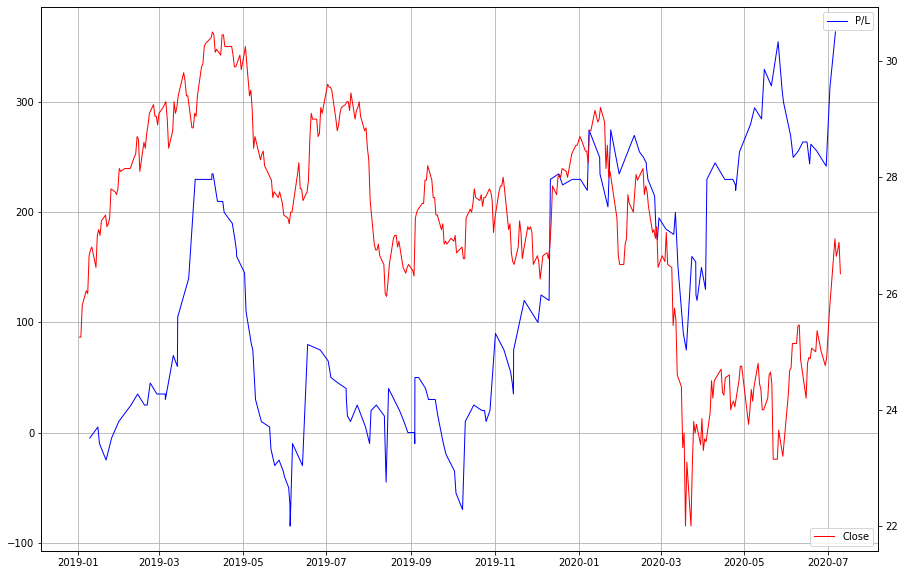

In [217]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_trade1["OpenDate"],df_trade1["Amount"].cumsum(),color="blue",label="P/L",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_daily["Date"],df_daily["Close"],color="red",label="Close",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

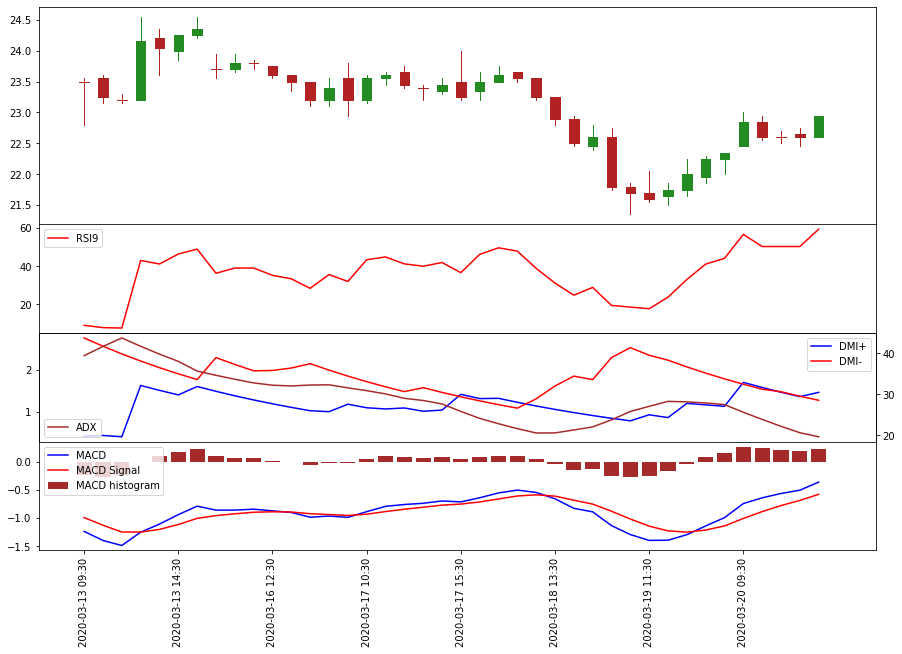

In [210]:
chart4("2020-03-13 09:30","2020-03-20 13:30")